In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


### Overlaying the data from Lars' fits on top of mine here

In [2]:
larsDataPath = ["variance_60h_10-24.csv",
                "variance_endgameB_10-24.csv",
                "yposition_endgameA_10-24.csv",
                "variance_60h_25-32.csv",
                "variance_endgameB_25-32.csv",
                "yposition_endgameA_25-32.csv",
                "variance_9day_10-24.csv",
                "yposition_60h_10-24.csv",
                "yposition_endgameB_10-24.csv",
                "variance_9day_25-32.csv",
                "yposition_60h_25-32.csv",
                "yposition_endgameB_25-32.csv",
                "variance_endgameA_10-24.csv",
                "yposition_9day_10-24.csv",
                "variance_endgameA_25-32.csv",
                "yposition_9day_25-32.csv"
               ]

In [3]:
df = pandas.DataFrame()#columns=['fileindex', 'calo', 'int', 'int_err', 'slope', 'slope_err', 'chi2', 'dataset', 'Erange'])

for file in larsDataPath:
    dataset = file.split("_")[1]
    erange = file.split("_")[2].split(".")[0]
    varOrPos = file.split("_")[0]
    
    dfi = pandas.read_csv("./fitresults/"+file)
    dfi['dataset'] = [dataset for i in range(len(dfi))]
    dfi['Erange'] = [erange for i in range(len(dfi))]
    dfi['var'] = [varOrPos for i in range(len(dfi))]
    dfi.head()
    
    df = df.append(dfi, ignore_index=True)
    
    print(dataset, erange)
    
df.head()

60h 10-24
endgameB 10-24
endgameA 10-24
60h 25-32
endgameB 25-32
endgameA 25-32
9day 10-24
60h 10-24
endgameB 10-24
9day 25-32
60h 25-32
endgameB 25-32
endgameA 10-24
9day 10-24
endgameA 25-32
9day 25-32


,Unnamed: 0,caloNum,a,a error,b,b error,chi2,dataset,Erange,var
0,0,1.0,0.027820,0.010507,916.939277,0.977426,5.780764,60h,10-24,variance
1,1,2.0,0.019964,0.008343,1068.640150,0.776560,2.187597,60h,10-24,variance
2,2,3.0,0.018569,0.008130,937.264279,0.756767,3.213716,60h,10-24,variance
3,3,4.0,0.009687,0.008989,933.255890,0.837071,3.874484,60h,10-24,variance
4,4,5.0,0.011569,0.009064,962.126271,0.843993,3.630526,60h,10-24,variance


In [4]:
df.describe()

,Unnamed: 0,caloNum,a,a error,b,b error,chi2
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,11.500000,12.500000,0.009113,0.005673,423.687846,0.528299,1.909267
std,6.931217,6.931217,0.013464,0.006683,432.114592,0.622400,2.579901
min,0.000000,1.000000,-0.056287,0.000060,-2.990715,0.005586,0.284395
25%,5.750000,6.750000,-0.000772,0.000225,1.064486,0.020914,0.767272
50%,11.500000,12.500000,-0.000038,0.002249,245.364946,0.209364,1.133097
75%,17.250000,18.250000,0.019273,0.009980,910.868307,0.928954,1.631657
max,23.000000,24.000000,0.062587,0.030815,1068.640150,2.880444,16.425111


In [5]:
dfeast = pandas.read_csv("./fitresults/east_endgameA.csv")
for file in ['endgameB', '60h', '9day']:
    dfi = pandas.read_csv("./fitresults/east_"+file+".csv")
    dfeast = dfeast.append(dfi)

In [6]:
dfeast.head()

,Unnamed: 0,mean_slope,mean_slope_err,var_slope,var_slope_err,dataset,Erange,calo
0,0,-0.001392,0.000061,0.001148,0.002606,endgameA,10-24,1
1,1,-0.001145,0.000064,-0.001608,0.002789,endgameA,10-24,2
2,2,-0.001260,0.000063,-0.002337,0.002753,endgameA,10-24,3
3,3,-0.001301,0.000064,-0.009151,0.002753,endgameA,10-24,4
4,4,-0.001698,0.000068,-0.010238,0.003085,endgameA,10-24,5


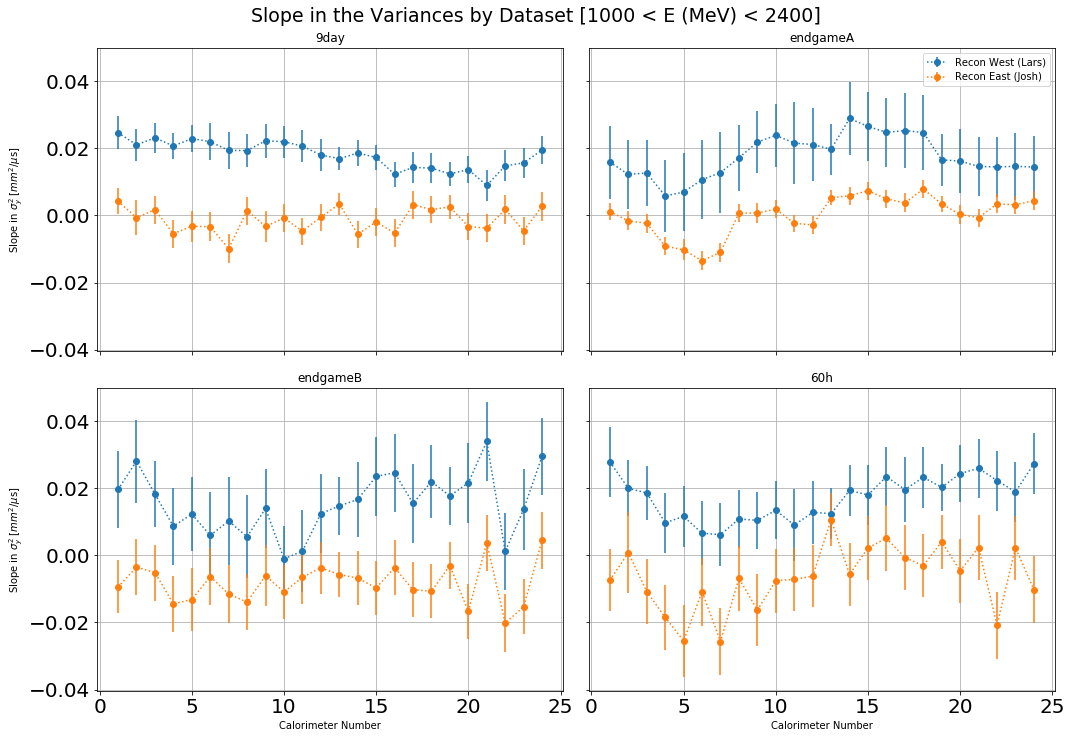

In [7]:
fig,axs = plt.subplots(2,2,figsize=(15,10),sharex=True, sharey=True)
ax = flatten2dArray(axs)

for i, dataset in enumerate(list(set(df['dataset']))):
    axi = ax[i]
    dfi = df.loc[df['dataset'] == dataset].loc[df['Erange'] == '10-24'].loc[df['var'] == 'variance']
    axi.errorbar(dfi['caloNum'], dfi['a'], 
                 yerr = dfi['a error'],
                fmt="o:", label="Recon West (Lars)")
    
    dfi_east = dfeast.loc[dfeast['dataset'] == dataset]
    if(len(dfi_east) > 0):
        axi.errorbar(dfi_east['calo'], dfi_east['var_slope'], 
                 yerr = dfi_east['var_slope_err'],
                fmt="o:", label="Recon East (Josh)")
    
    axi.set_title(dataset)
    axi.grid()
    if(i % 2 == 0):
        axi.set_ylabel(r"Slope in $\sigma_{y}^{2}$ [$mm^{2}/\mu$s]")
    if(i > 1):
        axi.set_xlabel(r"Calorimeter Number")
plt.suptitle("Slope in the Variances by Dataset [1000 < E (MeV) < 2400]",y=1.02,fontsize=19)
plt.tight_layout()
ax[1].legend()

plt.show()